In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
# !kaggle datasets download -d crawford/emnist

In [3]:
! kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

 96% 177M/185M [00:05<00:00, 31.4MB/s]
100% 185M/185M [00:05<00:00, 33.4MB/s]


In [4]:
# import zipfile

In [5]:
!unzip az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [1]:
import numpy as np 
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten,  GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
import os
from PIL import Image
import seaborn as sns

In [2]:
import pandas as pd
train = pd.read_csv('A_Z Handwritten Data.csv' , header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
col=[]
for i in train.columns.tolist():
    col.append('col_'+str(i))
col[:5]

['col_0', 'col_1', 'col_2', 'col_3', 'col_4']

In [6]:
train.columns=col
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_775,col_776,col_777,col_778,col_779,col_780,col_781,col_782,col_783,col_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.rename(columns={'col_0':'Target'}, inplace=True)
train.head()

,Target,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_775,col_776,col_777,col_778,col_779,col_780,col_781,col_782,col_783,col_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train['Target'].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13870
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: Target, dtype: int64

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import cv2
import tensorflow
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
!pip install utils
from utils import *

In [18]:
def extract(img) : 
  kernel = np.ones((5,5))
  img2=img.copy()
  gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  gray_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
	                                     cv2.THRESH_BINARY_INV, blockSize = 321, C = 80)
  gray_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
  gray_img = cv2.dilate(gray_img,kernel,iterations = 3)
  gray_img = cv2.erode(gray_img,kernel,iterations = 1)
  gray_image = cv2.morphologyEx(gray_img, cv2.MORPH_CLOSE, kernel)
  lst=[]
  for j in range(gray_image.shape[1]):
    sum = 0
    for i in range(gray_image.shape[0]):
      sum = sum+gray_image[i][j]
    lst.append(sum)
  rect = []
  f = 0
 
  for i in range(len(lst)):
    if lst[i] != 0 and f==0:
      x1=i
      f=1
    elif lst[i] == 0 and f==1:
      x2=i
      if(abs(x1-x2)>30):
        rect.append([min(x1,x2),max(x1,x2)])
      f=0 
  for k in range(len(rect)):
    x1=rect[k][0]
    x2=rect[k][1]
    lst2=[]
    for i in range(gray_image.shape[0]):
      sum=0
      for j in range(min(x1,x2),max(x1,x2)+1):
        sum = sum+gray_image[i][j]
      lst2.append(sum)
    # print(lst2)
    f=0
    for i in range(len(lst2)):
      if lst2[i] != 0 and f==0:
        y1=i
        f=1
      if lst2[i] == 0 and f==1:
        y2=i
        if(abs(y2-y1)>30):
          rect[k].append(min(y1,y2))
          rect[k].append(max(y1,y2))
        f=0 
  return gray_img, rect

In [ ]:
## just creating alphabet model

In [11]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', input_shape=(28,28,1)))
model_a.add(keras.layers.Dropout(.5))

model_a.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
model_a.add(keras.layers.Dropout(.5))

model_a.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
model_a.add(keras.layers.Flatten())

model_a.add(keras.layers.Dense(units=150, activation='relu'))
model_a.add(keras.layers.Dense(units=26, activation='softmax'))

model_a.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 12)        312       
                                                                 
 dropout (Dropout)           (None, 12, 12, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 18)          1962      
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 18)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 24)          1752      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 150)               5

In [9]:
train= train.sample(frac=1)
x = train.drop(columns = ['Target'])
y = train['Target']
x = np.array(x).astype(float)
y = np.array(y).astype(float)
x = x.reshape(x.shape[0] , 28 , 28 , 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
train['Target'].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13870
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: Target, dtype: int64

In [12]:
history = model_a.fit(x_train , y_train , epochs = 5)

Epoch 1/5
9312/9312 [==============================] - 86s 9ms/step - loss: 0.3612 - accuracy: 0.8932
Epoch 2/5
9312/9312 [==============================] - 85s 9ms/step - loss: 0.1758 - accuracy: 0.9473
Epoch 3/5
9312/9312 [==============================] - 84s 9ms/step - loss: 0.1514 - accuracy: 0.9540
Epoch 4/5
9312/9312 [==============================] - 84s 9ms/step - loss: 0.1376 - accuracy: 0.9580
Epoch 5/5
9312/9312 [==============================] - 83s 9ms/step - loss: 0.1294 - accuracy: 0.9603


In [13]:
model_a.evaluate(x_test ,y_test)

2328/2328 [==============================] - 9s 4ms/step - loss: 0.0757 - accuracy: 0.9780


[0.07568840682506561, 0.977997362613678]

In [14]:
model_a.save('only_alphabet_model.h5')

In [80]:
def predict2(image):
    model_emoji = load_model('/content/emoji_model.h5')     # I uploaded emoji model which i prepared in another notebook . I am doing this to just check the segmentation and all.
    model = load_model('/content/only_alphabet_model.h5')
    class_mapping='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    class_mapping1='1234567'
    count=0
    total=0
    images, rect=extract(image)
    answer=""
    for i in range(len(rect)):
        if(len(rect[i])==4):
          image1=images[rect[i][2]:rect[i][3], rect[i][0]:rect[i][1]]
        else:
          continue
        image1=cv2.copyMakeBorder(image1,40,40,40,40,cv2.BORDER_CONSTANT)
        image1 = cv2.resize(image1, (28, 28))
        cv2_imshow(image1)
        image1 = (np.array(image1)).reshape(1 , 28 , 28 , 1)
        image1=image1/255

        result = np.argmax(model.predict(image1))
        result_confidence=np.max(model.predict(image1))

        result1 = np.argmax(model_emoji.predict(image1))
        result_confidence1=np.max(model_emoji.predict(image1))
        if(result_confidence1>result_confidence and result_confidence<0.99):
          print("model_emoji",class_mapping1[result1],result_confidence1)
          print("model_alphabet",class_mapping[result],result_confidence)
          answer+=(class_mapping1[result1])
        else :
          print("model_alphabet",class_mapping[result],result_confidence)
          print("model_emoji",class_mapping1[result1],result_confidence1)
          answer+=(class_mapping[result])
    return answer

In [81]:
img = cv2.imread('a1.jpeg')

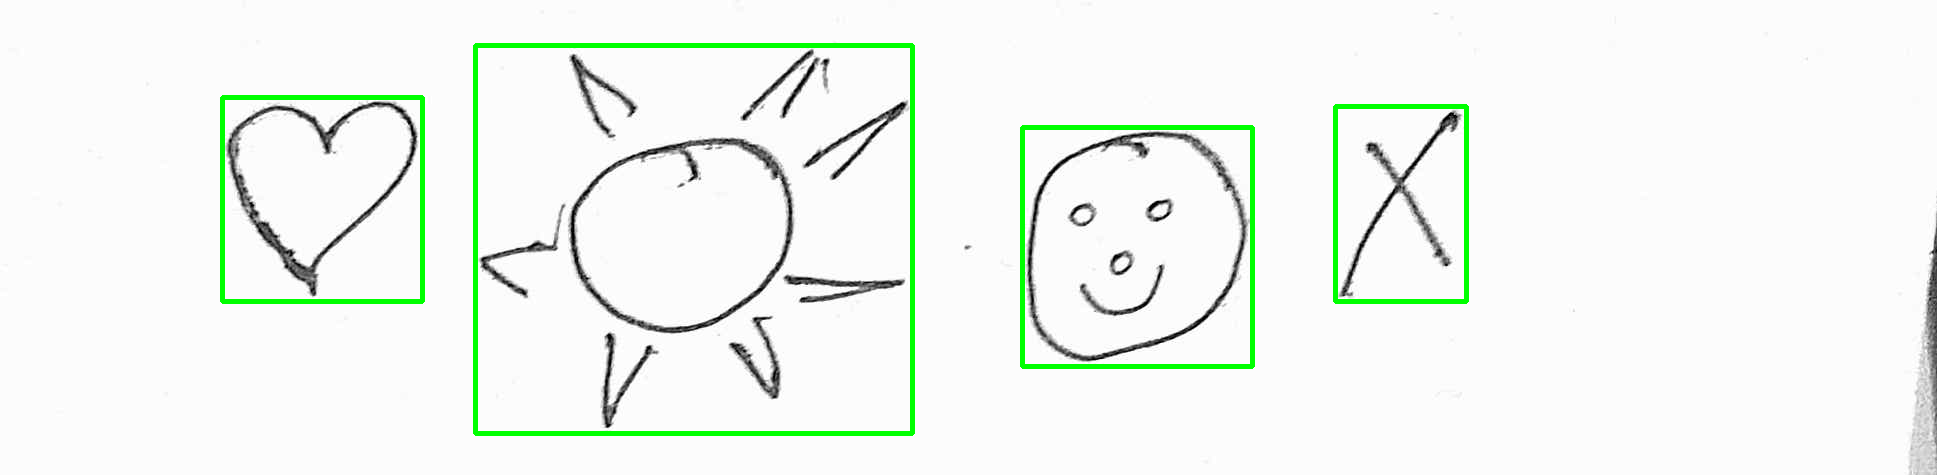

model_emoji 4 0.9143056
model_alphabet V 0.5172088


model_emoji 7 0.9987643
model_alphabet E 0.2419749


model_emoji 6 0.8182353
model_alphabet B 0.564534


model_alphabet X 0.99966824
model_emoji 1 0.90055144


'476X'

In [82]:
predict2(img)